In [1]:
from ema_workbench import load_results
from ema_workbench.analysis import pairs_plotting
import matplotlib.pyplot as plt
from ema_workbench.analysis import feature_scoring
import seaborn as sns
from ema_workbench.analysis import prim
import pandas as pd
from SALib.analyze import sobol
from ema_workbench import Samplers
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench import Model, RealParameter, ScalarOutcome
from ema_workbench import MultiprocessingEvaluator, ema_logging

from ema_workbench import save_results
import numpy as np
import scipy

In [2]:
def make_scatterplot_full(uncertainty, outcomes):
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    axs[0].scatter(uncertainty, outcomes.get("continuity_mean"))
    axs[0].set_title("continuity_mean")
    axs[0].set_xlabel(uncertainty.name)
    axs[0].set_ylabel('continuity_mean')
    
    axs[1].scatter(uncertainty, outcomes.get("connectivity_mean"))
    axs[1].set_title("connectivity_mean")
    axs[1].set_xlabel(uncertainty.name)
    axs[1].set_ylabel('connectivity_mean')
    
    axs[2].scatter(uncertainty, outcomes.get("node_frequency_mean"))
    axs[2].set_title("node_frequency_mean")
    axs[2].set_xlabel(uncertainty.name)
    axs[2].set_ylabel('node_frequency_mean')
    

# Read in data

In [3]:
residential_south_OA_experiments, residential_south_OA_outcomes = load_results('data/residential_south/results_residential_south_OA.gz')
residential_south_RP_experiments, residential_south_RP_outcomes = load_results('data/residential_south/results_residential_south_RP.gz')
residential_south_TA_experiments, residential_south_TA_outcomes = load_results('data/residential_south/results_residential_south_TA.gz')
residential_south_HS_experiments, residential_south_HS_outcomes = load_results('data/residential_south/results_residential_south_HS.gz')

In [4]:
residential_south_OA_experiments.keys()

Index(['OA', 'scenario', 'policy', 'model'], dtype='object')

In [5]:
outcomes_change = residential_south_OA_outcomes
residential_south_OA_outcomes = {}
residential_south_OA_outcomes["connectivity_mean"] = outcomes_change['connectivity_mean']
residential_south_OA_outcomes["connectivity_var"] = outcomes_change['connectivity_vars']
residential_south_OA_outcomes["continuity_mean"] = outcomes_change['continuity_mean']
residential_south_OA_outcomes["continuity_var"] = outcomes_change['continuity_vars']
residential_south_OA_outcomes["node_frequency_mean"] = outcomes_change['node_frequency_mean']
residential_south_OA_outcomes["node_frequency_var"] = outcomes_change['node_frequency_var']

In [6]:
outcomes_change = residential_south_RP_outcomes
residential_south_RP_outcomes = {}
residential_south_RP_outcomes["connectivity_mean"] = outcomes_change['connectivity_mean']
residential_south_RP_outcomes["connectivity_var"] = outcomes_change['connectivity_vars']
residential_south_RP_outcomes["continuity_mean"] = outcomes_change['continuity_mean']
residential_south_RP_outcomes["continuity_var"] = outcomes_change['continuity_vars']
residential_south_RP_outcomes["node_frequency_mean"] = outcomes_change['node_frequency_mean']
residential_south_RP_outcomes["node_frequency_var"] = outcomes_change['node_frequency_var']

In [7]:
outcomes_change = residential_south_TA_outcomes
residential_south_TA_outcomes = {}
residential_south_TA_outcomes["connectivity_mean"] = outcomes_change['connectivity_mean']
residential_south_TA_outcomes["connectivity_var"] = outcomes_change['connectivity_vars']
residential_south_TA_outcomes["continuity_mean"] = outcomes_change['continuity_mean']
residential_south_TA_outcomes["continuity_var"] = outcomes_change['continuity_vars']
residential_south_TA_outcomes["node_frequency_mean"] = outcomes_change['node_frequency_mean']
residential_south_TA_outcomes["node_frequency_var"] = outcomes_change['node_frequency_var']

In [8]:
outcomes_change = residential_south_HS_outcomes
residential_south_HS_outcomes = {}
residential_south_HS_outcomes["connectivity_mean"] = outcomes_change['connectivity_mean']
residential_south_HS_outcomes["connectivity_var"] = outcomes_change['connectivity_vars']
residential_south_HS_outcomes["continuity_mean"] = outcomes_change['continuity_mean']
residential_south_HS_outcomes["continuity_var"] = outcomes_change['continuity_vars']
residential_south_HS_outcomes["node_frequency_mean"] = outcomes_change['node_frequency_mean']
residential_south_HS_outcomes["node_frequency_var"] = outcomes_change['node_frequency_var']

# Analysis

Correlations

In [9]:
corr_mat = pd.DataFrame(columns=['continuity_mean', 'connectivity_mean', 'node_frequency_mean'])
p_mat = pd.DataFrame()


for value in ['continuity_mean', 'connectivity_mean', 'node_frequency_mean']:
    corr_mat.at["TA", value] = scipy.stats.kendalltau(residential_south_TA_experiments["TA"], pd.DataFrame(residential_south_TA_outcomes)[value])[0]
    p_mat.at["TA", value] = scipy.stats.kendalltau(residential_south_TA_experiments["TA"], pd.DataFrame(residential_south_TA_outcomes)[value])[1]
    

for value in ['continuity_mean', 'connectivity_mean', 'node_frequency_mean']:
    corr_mat.at["OA", value] = scipy.stats.kendalltau(residential_south_OA_experiments["OA"], pd.DataFrame(residential_south_OA_outcomes)[value])[0]
    p_mat.at["OA", value] = scipy.stats.kendalltau(residential_south_OA_experiments["OA"], pd.DataFrame(residential_south_OA_outcomes)[value])[1]
    

for value in ['continuity_mean', 'connectivity_mean', 'node_frequency_mean']:
    corr_mat.at["HS", value] = scipy.stats.kendalltau(residential_south_HS_experiments["HS"], pd.DataFrame(residential_south_HS_outcomes)[value])[0]
    p_mat.at["HS", value] = scipy.stats.kendalltau(residential_south_HS_experiments["HS"], pd.DataFrame(residential_south_HS_outcomes)[value])[1]
    

for value in ['continuity_mean', 'connectivity_mean', 'node_frequency_mean']:
    corr_mat.at["RP", value] = scipy.stats.kendalltau(residential_south_RP_experiments["RP"], pd.DataFrame(residential_south_RP_outcomes)[value])[0]
    p_mat.at["RP", value] = scipy.stats.kendalltau(residential_south_RP_experiments["RP"], pd.DataFrame(residential_south_RP_outcomes)[value])[1]

In [10]:
corr_mat

,continuity_mean,connectivity_mean,node_frequency_mean
TA,0.843815,0.748846,0.300362
OA,0.845905,0.351198,-0.01624
HS,0.007369,0.121048,0.193076
RP,-0.766437,-0.332901,-0.1323


In [11]:
p_mat

,continuity_mean,connectivity_mean,node_frequency_mean
TA,6.999419e-31,5.040422e-25,0.000038
OA,4.180491e-30,1.986949e-06,0.826759
HS,9.231136e-01,1.127414e-01,0.011451
RP,7.836129e-27,2.418990e-06,0.062165


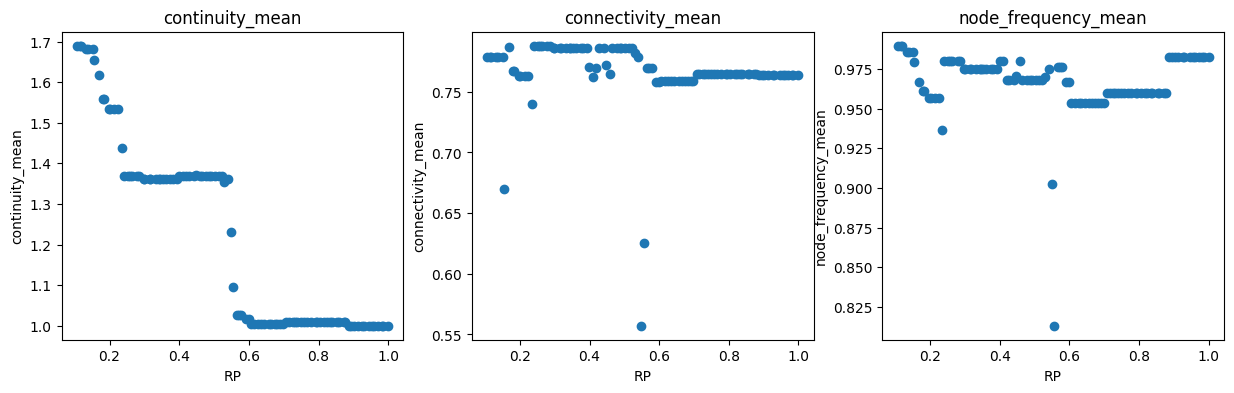

In [12]:
make_scatterplot_full(residential_south_RP_experiments["RP"], residential_south_RP_outcomes)

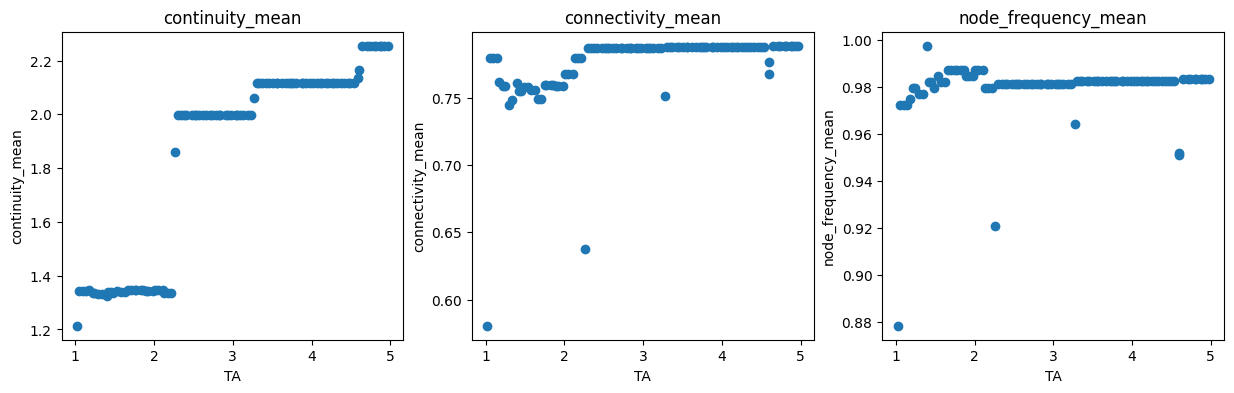

In [13]:
make_scatterplot_full(residential_south_TA_experiments["TA"], residential_south_TA_outcomes)

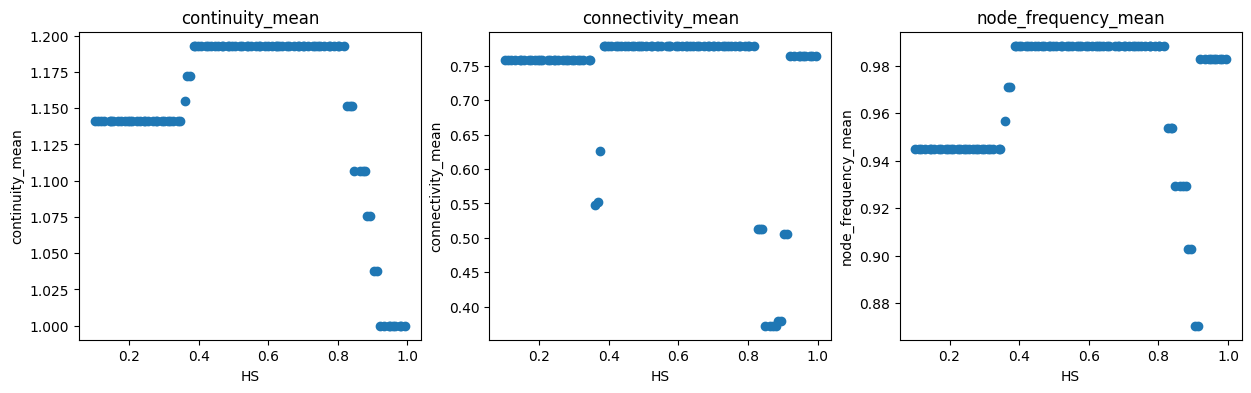

In [14]:
make_scatterplot_full(residential_south_HS_experiments["HS"], residential_south_HS_outcomes)

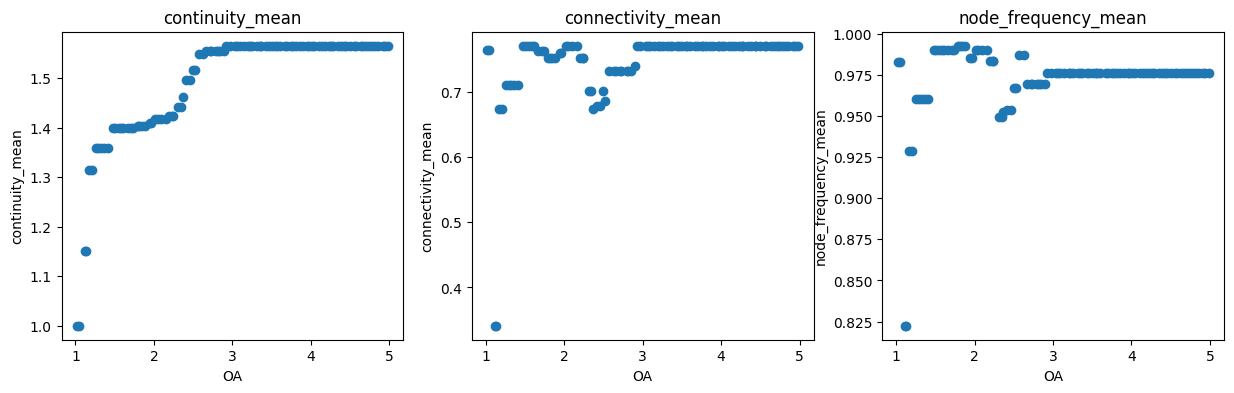

In [15]:
make_scatterplot_full(residential_south_OA_experiments["OA"], residential_south_OA_outcomes)